# Build a Deep CNN Immage Classifier

### 1. Data Preperation

In [1]:
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import xml.etree.ElementTree as ET

2024-08-22 01:40:36.449671: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-22 01:40:36.599876: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tugalinebacker/anaconda3/envs/hms_surprise/lib/python3.9/site-packages/cv2/../../lib64:/opt/ros/noetic/lib:/usr/local/cuda-11.3/lib64
2024-08-22 01:40:36.599899: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-08-22 01:40:37.367210: W tensorflow/compiler/xla/stream_executor/platform/default

#### 1.1 Check for faulty extensions or non-RGB images

In [2]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

data_dir = '/home/tugalinebacker/hms_surprise/data/raw/deep_conv_tutorial/images'
os.listdir(os.path.join(data_dir))

for image in os.listdir(os.path.join(data_dir)):
    image_path = os.path.join(data_dir, image)
    try:
        img = cv2.imread(image_path)
        if img.shape[2] != 3:
            print('Image is not RGB -> ' + img.shap[2] + ' channels detected.')
        tip = imghdr.what(image_path)
        if tip not in image_exts:
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)
    except Exception as e:
        print('issue with image {}'.format(image_path))
        

In [3]:
test = cv2.imread(os.path.join('..','data','raw','deep_conv_tutorial','images','ghost98.jpg'))

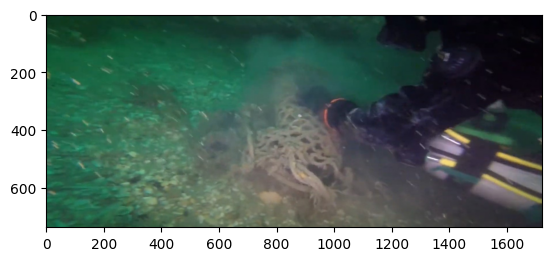

In [4]:
test.shape
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))

#### 1.2 Load Data

In [ ]:
tf.data.Dataset??

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [5]:
image_dir = os.path.join('..','data','raw','deep_conv_tutorial','images')
annotation_dir = os.path.join('..','data','raw','deep_conv_tutorial','annotations')

classes = ['ghost_net', 'fish', 'crab']

image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir)]
annotation_paths = [os.path.join(annotation_dir, fname.replace('.jpg', '.xml')) for fname in os.listdir(image_dir)]

In [6]:
# Helper function to parse XML annotations
def parse_annotation(annotation_path):
    tree = ET.parse(annotation_path)
    root = tree.getroot()
    labels = []
    for obj in root.findall('object'):
        class_name = obj.find('name').text
        labels.append(classes.index(class_name))
    return labels

# Function to load an image and its labels
def load_data(image_path, annotation_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])  # Resize if needed
    
    labels = tf.py_function(func=parse_annotation, inp=[annotation_path], Tout=tf.int32)
    
    # Assuming one-hot encoding for the labels
    labels = tf.reduce_sum(tf.one_hot(labels, depth=len(classes)), axis=0)
    
    return image, labels

In [7]:
dataset = tf.data.Dataset.from_tensor_slices((image_paths, annotation_paths))
dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
dataset = dataset.batch(32).prefetch(tf.data.AUTOTUNE)

2024-08-22 01:41:00.513220: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-22 01:41:00.513732: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tugalinebacker/anaconda3/envs/hms_surprise/lib/python3.9/site-packages/cv2/../../lib64:/opt/ros/noetic/lib:/usr/local/cuda-11.3/lib64
2024-08-22 01:41:00.513805: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tugalinebacker/anaconda3/envs/hms_surprise/lib/python3.9/site-packages/cv2/../../lib64:/opt/ros/noetic/

In [29]:
import xml.etree.ElementTree as ET

def parse_annotation(heya):
    tree = ET.parse(heya)
    root = tree.getroot()
    labels = []
    for obj in root.findall('object'):
        class_name = obj.find('name').text
        print(class_name)
        labels.append(classes.index(class_name))
    return labels

heya = '/home/tugalinebacker/hms_surprise/data/raw/deep_conv_tutorial/annotations/afp_news_trash_haunting_ocean_1.xml'
parse_annotation(heya)

ghost_net
ghost_net


[0, 0]